## Students Performance Analysis

### EDA and Machine Learning Models 
- EDA{
    - Understanding the Problem and Data
    - Data Collection
    - Data Cleaning
    - Exploratory Data Analysis
    - Feature Engineering
    - Data Preprocessing
    - Feature Selection
}

- Machine Learning Models{
    - Moddel Training
    - Model Selection
    - Model Prediction
    - Model Evaluation
    - Model Tuning
    - Model Deployment
}


## Problem Statement
- This Project aims to predict students performance based on their data such as Gender, Age, parental level of education, lunch and test preparation course etc. 

## Data Collection
- The dataset is available [here](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?select=StudentsPerformance.csv).

## 2.1 import Data and requied libraries
  - Libraries {
    - pandas
    - numpy
    - matplotlib
    - seaborn
    - sklearn
    - warnings
  }

In [8]:
#import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#import dataset
data = pd.read_csv('E:/data Science & AI/NLP/oop/Project/Notebook/data/StudentsPerformance.csv', encoding='utf-8')
data.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [9]:
#data types
data.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [10]:
#missing values
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [11]:
#duplicate values
data.duplicated().sum()

0

In [15]:
#summary
data.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


In [16]:
#shape
data.shape

(1000, 8)

In [17]:
#info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [20]:
#unique values
data.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [21]:
#numeric and categorical columns
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [23]:
#change columns names to short names 
data.rename(columns = {'race/ethnicity':'race_ethnicity','parental level of education':'parental_level_of_education','test preparation course':'test_preparation_course'}, inplace = True)
data.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [27]:
#features and target
data['total score'] = data['math score'] + data['reading score'] + data['writing score']
data['average'] = data['total score']/3
data.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [28]:
#no fo pass students
data['status'] = np.where(data['average'] >= 40, 'pass', 'fail')
data.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math score,reading score,writing score,total score,average,status
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667,pass
1,female,group C,some college,standard,completed,69,90,88,247,82.333333,pass
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667,pass
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333,pass
4,male,group C,some college,standard,none,76,78,75,229,76.333333,pass


In [30]:
data['status'].value_counts()

status
pass    970
fail     30
Name: count, dtype: int64

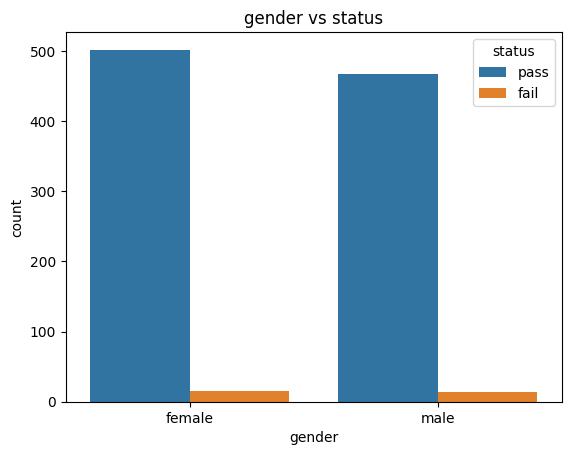

In [38]:
#visualization
sns.countplot(x='gender', data=data, hue='status')
#add title
plt.title('gender vs status')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_2532\2503064231.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  data.hist(bins=50, ax=ax, color='g')


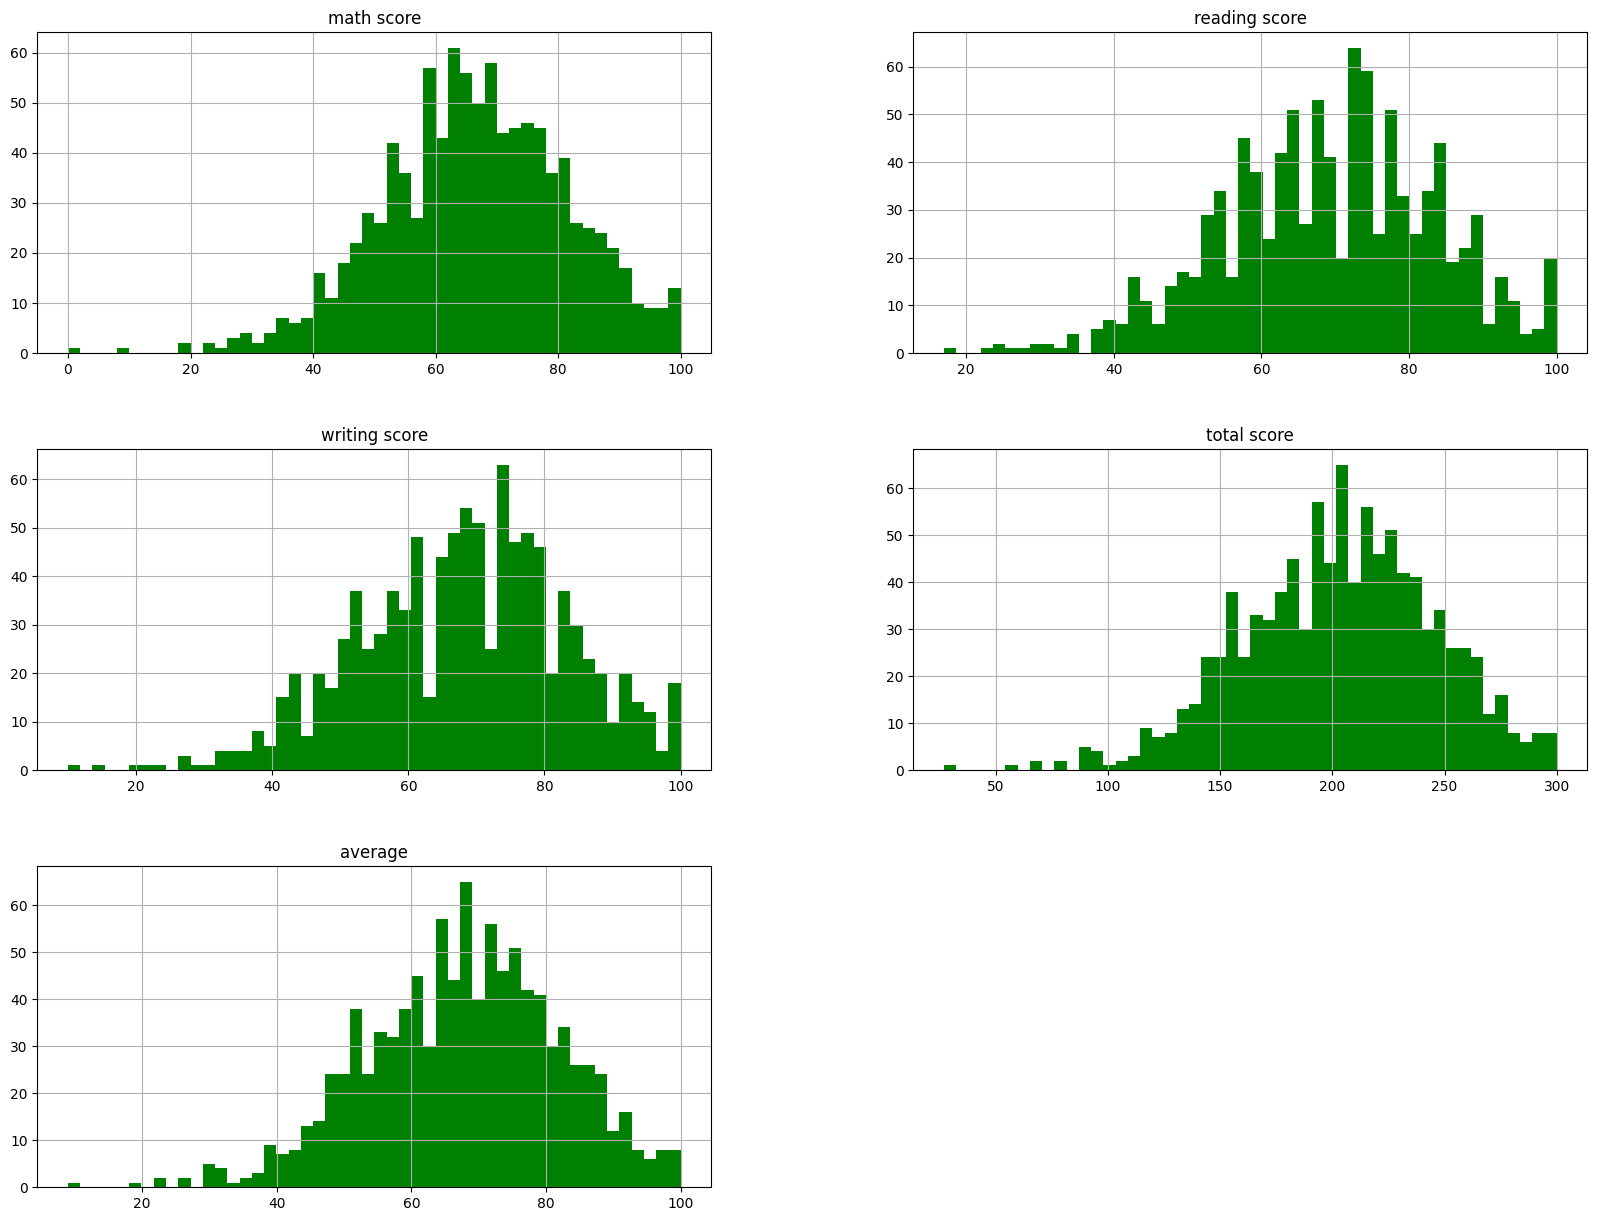

In [50]:
#histogram
fig, ax = plt.subplots(figsize=(20,15))
data.hist(bins=50, ax=ax, color='g')
plt.show()

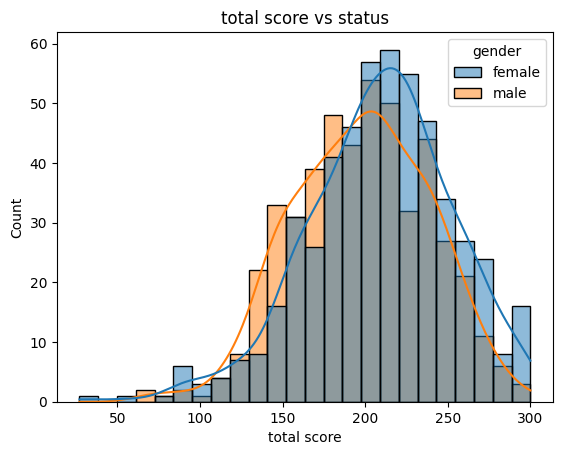

In [57]:
#total score of students
sns.histplot(x='total score', data=data, hue='gender', kde=True)
plt.title('total score vs status')
plt.show()